<a href="https://colab.research.google.com/github/kdhaw6/EDA-Airbnb-Booking-Analysis/blob/main/Capstone_Project_EDA_AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - AirBnb Booking Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Problem Statement**


Okay, before going to start. Let's understand what is Airbnb?

Looks Airbnb has interesting breakdown with names likely: Air, Bed and Breakfast to become Airbnb. Wow! This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. Looks, somewhat on a same business as OYO but the former doesn't owns any property instead acts as an intermediary between those who want to rent out space and those who are looking for space to rent.

Well, enough of it we understood what is the data all about and where it came from.

Excited much? Lets deep dive!

Let me include all the soldiers in the battle!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [ ]:
df_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')
df_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Data Exploration and variable Identification:



In [ ]:
#checking what are the variables here:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#just a sanity check:
#looks all the property ids are different and each listings are different here!

df_air['id'].nunique()

48895

So what are the numerical and categorical variables?

By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables

In [ ]:
#Looking out for Categorical variables
df_air.loc[df_air['name'] == 'Clean & quiet apt home by the park']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
df_air[df_air['host_name']=='John'].nunique()

id                                294
name                              293
host_id                           188
host_name                           1
neighbourhood_group                 5
neighbourhood                      56
latitude                          283
longitude                         281
room_type                           3
price                             106
minimum_nights                     18
number_of_reviews                  76
last_review                       146
reviews_per_month                 156
calculated_host_listings_count      8
availability_365                  137
dtype: int64

In [ ]:
df_air['neighbourhood'].nunique() #looks this can be a categorical var too. lets check as well


221

In [ ]:
df_air['host_name'].nunique() #unique hosts

11452

In [ ]:
df_air['name'].nunique() #unique listings

47905

In [ ]:
df_air['name'].value_counts()
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
df_air[df_air['name']==df_air['host_name']] #looks there are few listings where the property name and the host have same names!
#we can remove duplicates later in our analysis!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [ ]:
df_air[df_air['name']=='New york Multi-unit building'].head(4) #so on this viewpoint name also comes under categorical var!
#same property but hosted by different Airbnb hosts with different room_types & varied price ranges

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2751,1489426,New york Multi-unit building,7964729,Justin,Manhattan,Financial District,40.70582,-74.00888,Entire home/apt,390,3,1,2018-09-13,0.1,1,0
19016,15100883,New york Multi-unit building,95623284,Pablo,Bronx,Fordham,40.86533,-73.89713,Private room,40,3,1,2018-09-24,0.1,1,179
33473,26463879,New york Multi-unit building,21682640,Clarise,Brooklyn,Flatbush,40.64258,-73.95952,Private room,65,30,0,NaN,NaN,2,365
34613,27457026,New york Multi-unit building,125320407,Sata,Queens,Jamaica,40.70653,-73.80561,Entire home/apt,1000,2,0,NaN,NaN,5,365


In [ ]:
df_air['host_id'].value_counts()[:4] #host ids with most listings counts


219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

So, far I was trying to understand the two variables: name and host_name & its relationship with neighbourhood_group and neighbourhood.(only from the values present inside)

Found out that: A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id(not mandatory as there are exceptions where few hosts have diferrent id's for each listing/property in a neighbourhood)

Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood on Airbnb.

We'll not bother much as these are not that important in our analysis and proceed further!

In [ ]:
df_air.describe() #getting the overall summary statistics for all numerical columns


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looks there are some property listed with 0 listed price!



In [ ]:
len(df_air[df_air['price']== 0]) #so 11 property/listings have 0 price listed.

11

In [ ]:
#if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
#name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews
#these are the important ones in our analysis. We'll crosscheck though at last!

Let's do the analysis step by step!

<ipython-input-19-8d61720c1eb2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_air['price'])


<Axes: ylabel='Density'>

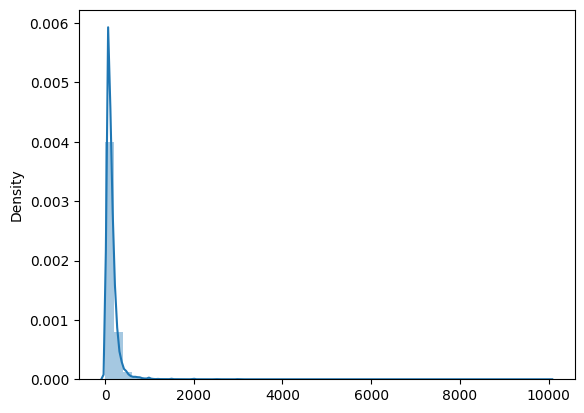

In [ ]:
  sns.distplot(x=df_air['price'])

In [ ]:
#The distribution tells it has positive skew
#also the distribution doesn't deviate much from normal distribution.

<Axes: xlabel='minimum_nights', ylabel='price'>

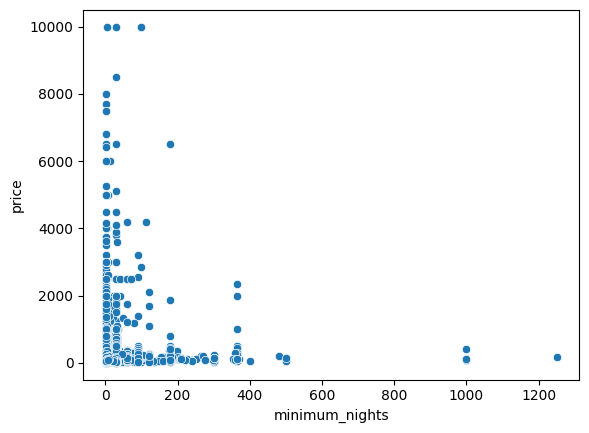

In [ ]:
sns.scatterplot(x=df_air['minimum_nights'], y=df_air['price'])

In [ ]:
#looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
#there are many outliers as well.

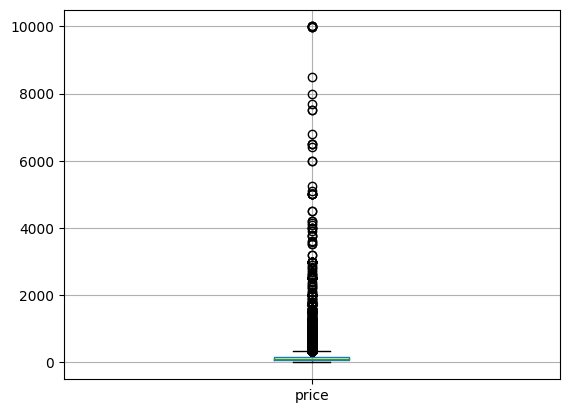

In [ ]:
df_air.boxplot(column=['price'])
plt.show()
#we can see the presence of many outliers in price. Definitely we'll remove those.

Let's check the correlation matrix to understand how are the features interrelated with each other.

Also to get an idea which are the most important features in this data.

<ipython-input-24-213343ef1d34>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_air.corr()


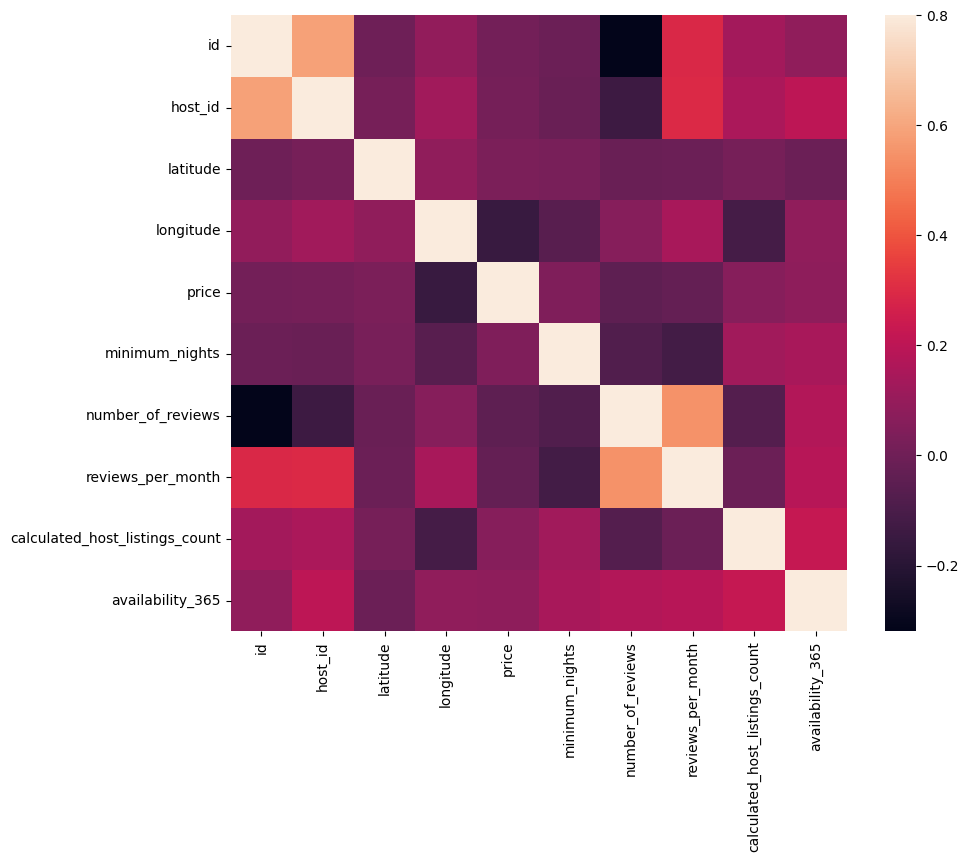

In [ ]:
#correlation matrix
corrmat = df_air.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing.

Guess what? There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

In [ ]:
#Checking null values in the columns
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values

As, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns!

In [ ]:
df_air['name'].fillna('unknown',inplace=True)
df_air['host_name'].fillna('no_name',inplace=True)

In [ ]:
df_air[['host_name','name']].isnull().values.any() #looks the null values are removed!

False

Also the column: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

In [ ]:
df_air= df_air.drop(['last_review'],axis=1)

In [ ]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]
#looks like there's no duplicate data present!

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's
makes sense right?

In [ ]:
df_air['reviews_per_month']=df_air['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [ ]:
df_air['reviews_per_month'].isnull().values.any()

False

Let's check the most no of listings in NYC first!

In [ ]:
#top 5 listings on Airbnb in entire NYC:

listings_count_df=df_air['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


In [ ]:
top_10_hosts=df_air['host_name'].value_counts()[:10] #top 10 hosts on the basis of no of listings in entire NYC!


In [ ]:
top_10_hosts


Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

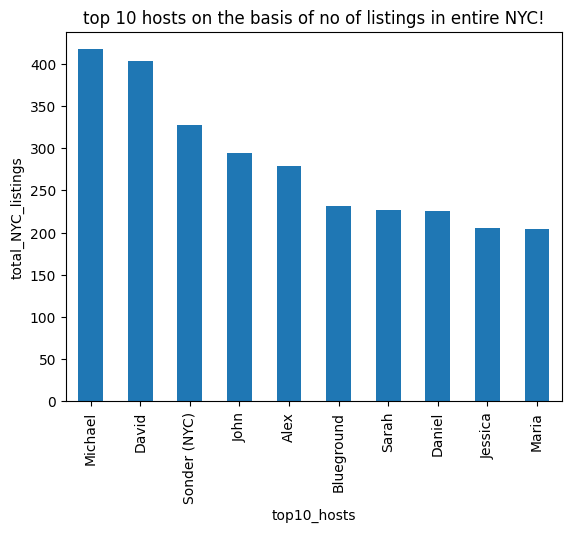

In [ ]:
top_10_hosts.plot(kind='bar')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

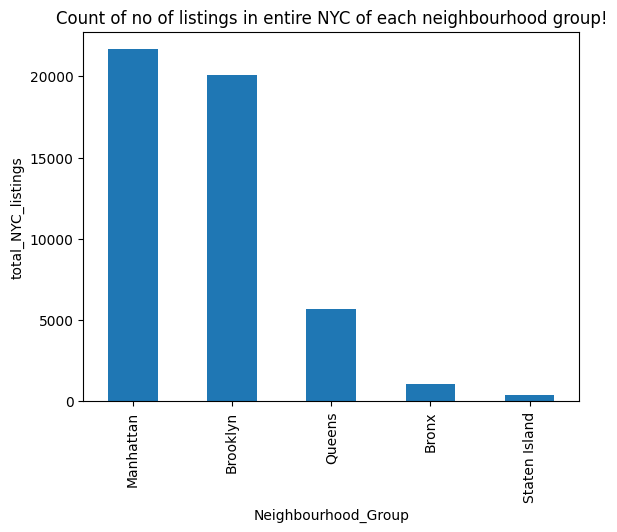

In [ ]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC!
df_air['neighbourhood_group'].value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

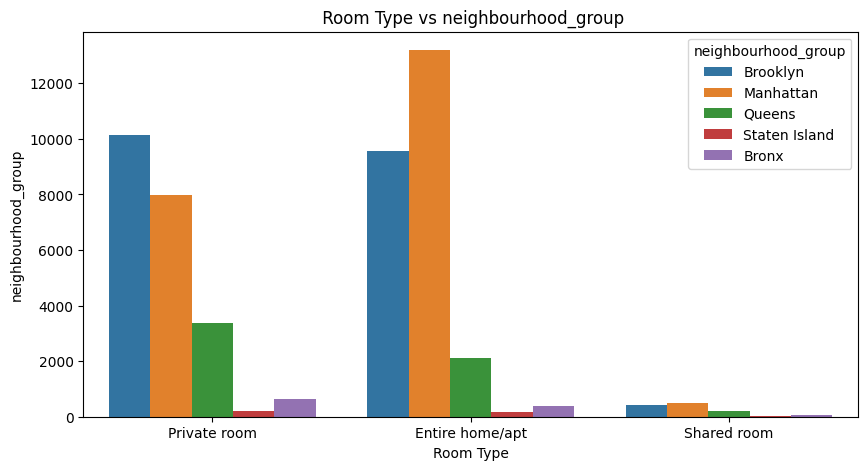

In [ ]:
plt.figure(figsize = (10,5))
ax_11 = sns.countplot(x='room_type',hue='neighbourhood_group',data=df_air)
ax_11.set_title(' Room Type vs neighbourhood_group')
ax_11.set_xlabel('Room Type')
ax_11.set_ylabel("neighbourhood_group")
plt.show()

Manhattan has more listed properties with Entire home/apt followed by Brooklyn.

Private rooms are more in Brooklyn followed by Manhattan.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# **Relationship between neighbourhood_group and median price.**

In [ ]:
neigh_group_price_group = df_air.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()


In [ ]:
neigh_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


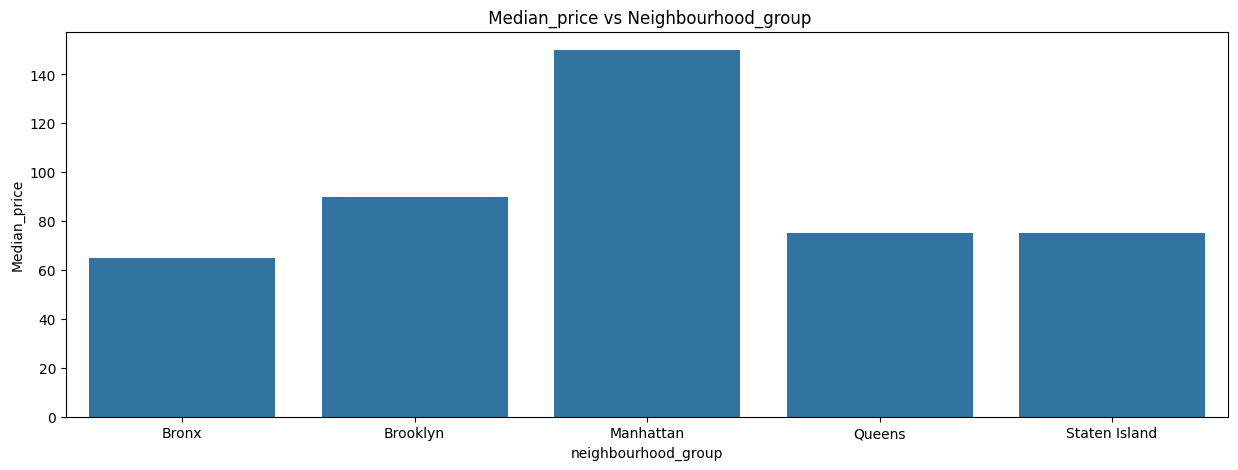

In [ ]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,5))
ax_12 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = neigh_group_price_group)
ax_12.set_title(' Median_price vs Neighbourhood_group')
ax_12.set_xlabel('neighbourhood_group')
ax_12.set_ylabel("Median_price")
plt.show()

Observations:

'Manhattan' is the area having highest median price,followed by Brooklyn.

# Removing the outliers from Price

In [ ]:
len(df_air[df_air['price'] == 0])  #checking how many properties have price as zero.

11

In [ ]:
df_air.shape

(48895, 15)

In [ ]:
# Removing those values to remove the Bias

In [ ]:
df_air_new = df_air[df_air.price != 0]

In [ ]:
df_air_new.shape

(48884, 15)

In [ ]:
#removing outliers / Don't run
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
df_air_new = remove_outlier(df_air_new, 'price')

In [ ]:
df_air_new.shape

(45907, 15)

<ipython-input-27-5b815858cea3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_air_new['price'])


<Axes: ylabel='Density'>

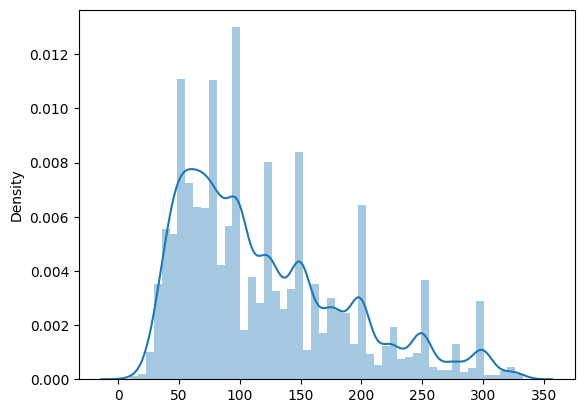

In [ ]:
sns.distplot(x=df_air_new['price'])

Relationship between price and room_type.


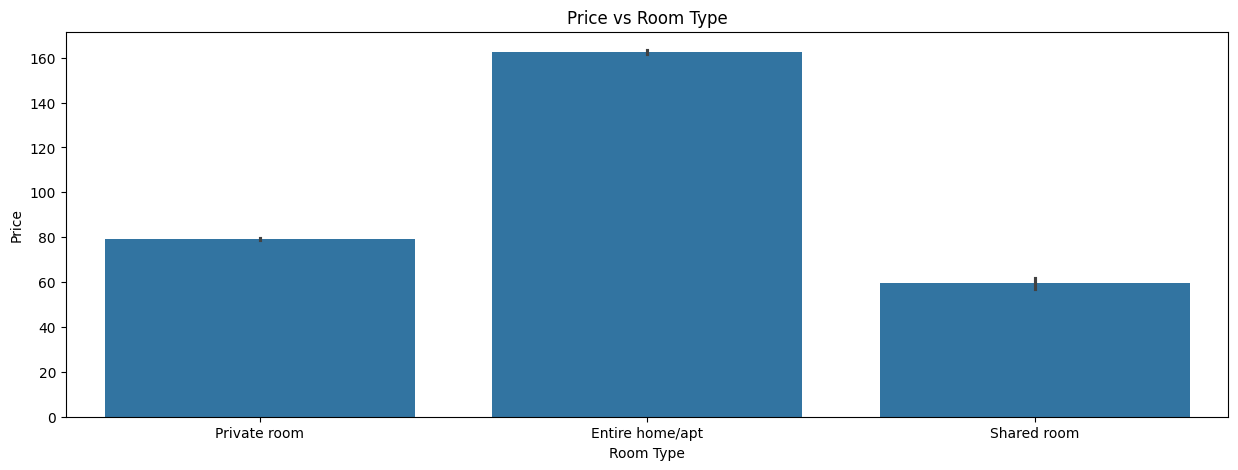

In [ ]:
plt.figure(figsize = (15,5))
ax_8 = sns.barplot(y= 'price', x= 'room_type',data=df_air_new)
ax_8.set_title('Price vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel("Price")
plt.show()

we can see that most of the prices for all type of rooms lies with 2000$
shared rooms prices are having very less price
very few rooms are there whic are in expensive cataagory.
large number of rooms are available in either entire room/apartment or private rooms/apartment.

Conclusion:
We tried to put some light by performed the Extensive EDA for Airbnb dataset as allways there is no end to EDA this can be extended in n-dimenssions and lots and lots of conclusion can be drawn from EDA this is where 80% of time is been spent by and Data Scientist.